## class(day-40:9-7-20)

### Hand-Written Digits Recognition

#### Data Collection:

In [1]:
#impoting libs:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
## load_data-->return value is two tuples train and test
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)

(60000, 28, 28)


There are 60000 images in the training data. Each image size --> 28*28

In [4]:
print(test_digits.shape)

(10000, 28, 28)


There are 10 classes from class 0 to class 9.

In [5]:
print(train_labels.shape)

(60000,)


To get the class wise counts

In [6]:
type(train_labels)

numpy.ndarray

In [7]:
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

### EDA

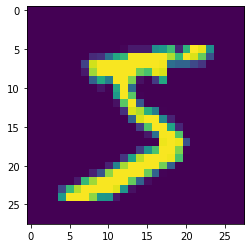

In [9]:
plt.imshow(train_digits[0])

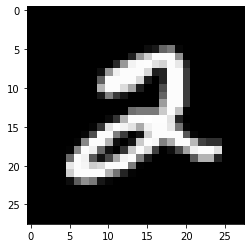

In [10]:
plt.imshow(train_digits[5],cmap="gray")

Text(0.5, 1.0, 'DIGIT 3')

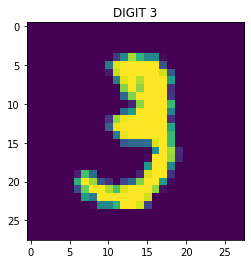

In [11]:
plt.imshow(train_digits[10])
plt.title("DIGIT "+str(train_labels[10]))

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

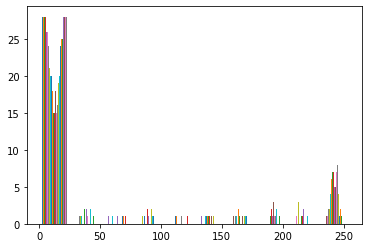

In [12]:
plt.hist(train_digits[0])

(array([[28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105.,

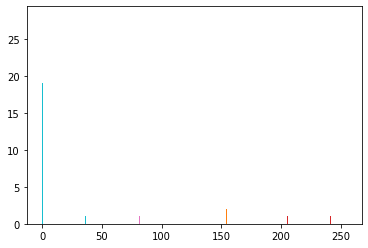

In [13]:
plt.hist(train_digits[0],bins=255)

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

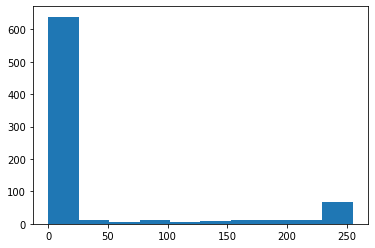

In [14]:
plt.hist(train_digits[0].flat)

In [15]:
samples=np.random.randint(train_digits.shape[0],size=16)
samples

array([17052, 33093,  6949, 23054, 37435, 13186, 38900, 52780,  7395,
       23767, 11317, 26902,  9800, 35945, 19525, 24537])

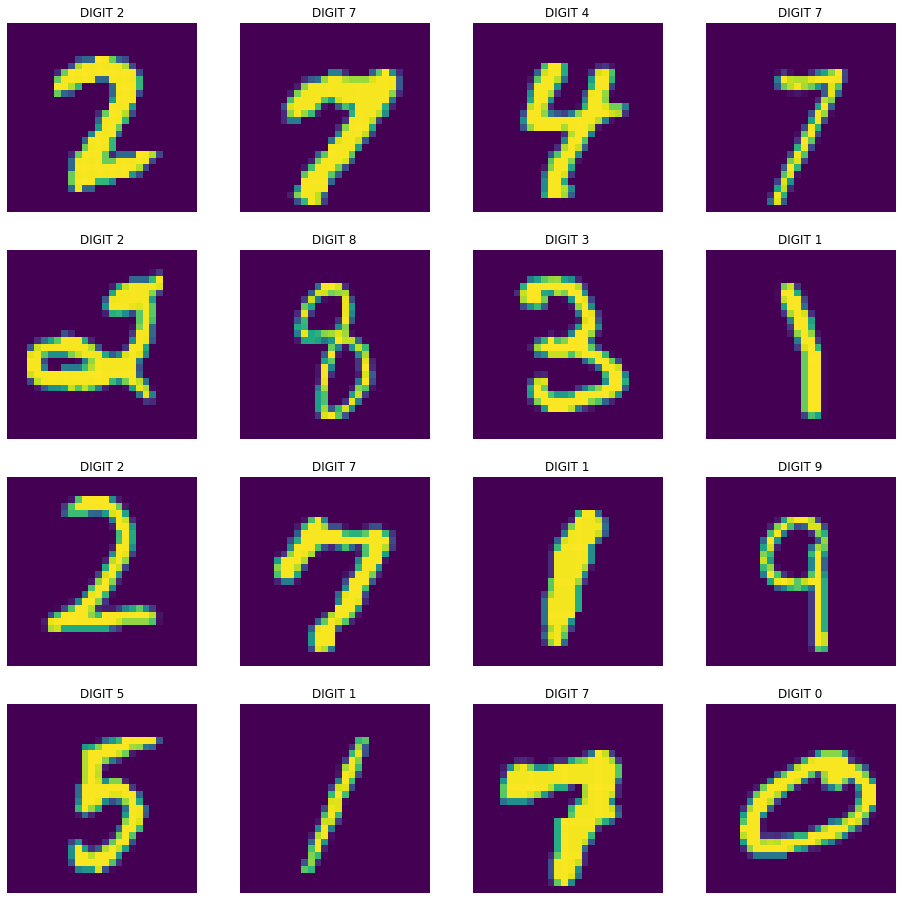

In [16]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("DIGIT "+str(train_labels[i]))
  plt.axis('off')
  j+=1

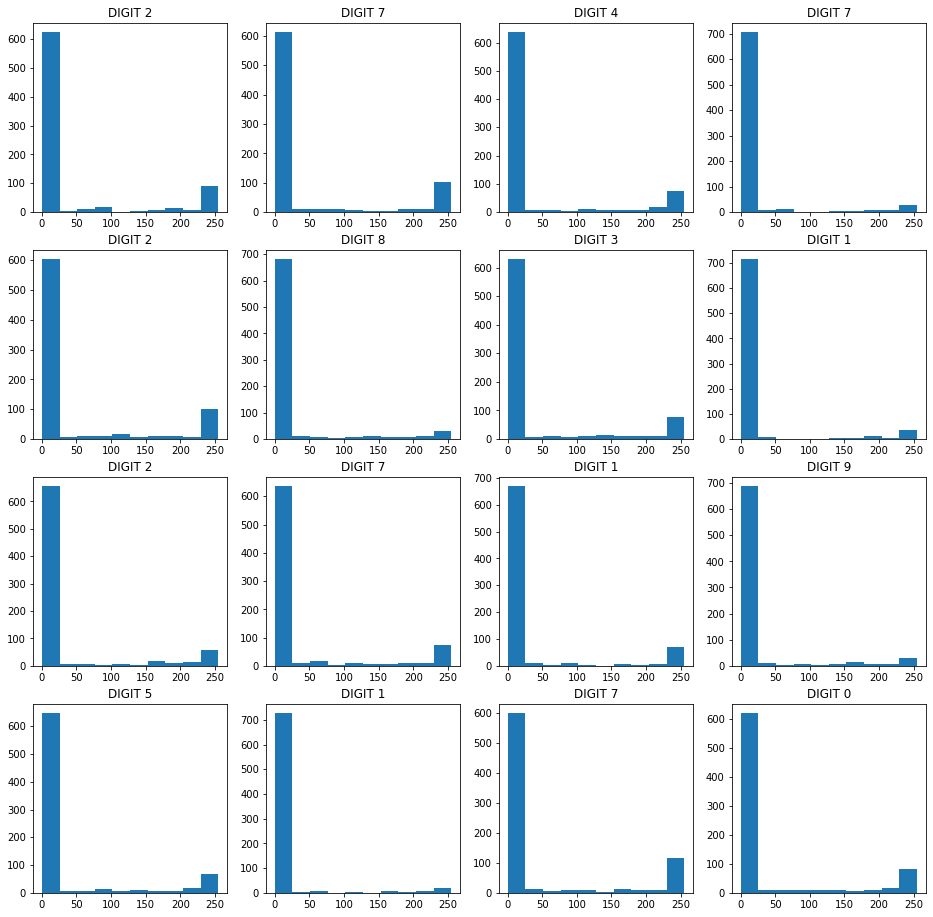

In [17]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("DIGIT "+str(train_labels[i]))
  j+=1

### Pre-processing

### Scaling:

In [18]:
train_digits_sc= train_digits/255.0
test_digits_sc=test_digits/255.0

In [19]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
#Convert labels into CATEGORICAL VALUES:
from keras.utils import to_categorical
train_labels_cat=to_categorical(train_labels)

In [21]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
test_labels_cat=to_categorical(test_labels)
test_labels_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Splitting and Validating the data:

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=54)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


### Building and Training the MODEL:
- we need to take 1d array as input for DENSE layer<br>
- How many Hidden Layer?<br>
- How many Neuron in each layer?<br>
- what is the ACTIVATION FUNCTION for the Hiddem=n layers?<br>
- How many neurons in the OUTPUT layer?<br>
- What is the ACTIVATION function for output layer?<br>

In [24]:
#Build the Model:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [25]:
#Now, we are creating the skeleton(the structure of the model)
#how many hidden layers, how many neurons etc.
model= Sequential()
#first layer:
model.add(Flatten(input_shape=(28,28))) #input layer
#784 pixel values as input to DENSE . 128 Neurons in the Layers.
#hidden layers:
model.add(Dense(128,activation='relu')) #728*28+128(bias) #128 bias for 128 nodes
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
#final layer:
model.add(Dense(10,activation='softmax')) #10 because--> there are 10 classes in the output layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

### Compile the MODEL
- what is the LOSS Func?<br>
- What is the OPTIMIZER?<br>
- What are the METRICS?<br>

In [26]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

### Train the model:

In [27]:
history = model.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 126us/step - loss: 0.2637 - accuracy: 0.9198 - val_loss: 0.1410 - val_accuracy: 0.9608
Epoch 2/10
54000/54000 [==============================] - 7s 123us/step - loss: 0.1268 - accuracy: 0.9638 - val_loss: 0.1171 - val_accuracy: 0.9657
Epoch 3/10
54000/54000 [==============================] - 7s 121us/step - loss: 0.0951 - accuracy: 0.9715 - val_loss: 0.1127 - val_accuracy: 0.9673
Epoch 4/10
54000/54000 [==============================] - 6s 120us/step - loss: 0.0790 - accuracy: 0.9772 - val_loss: 0.1053 - val_accuracy: 0.9712
Epoch 5/10
54000/54000 [==============================] - 7s 127us/step - loss: 0.0682 - accuracy: 0.9797 - val_loss: 0.1069 - val_accuracy: 0.9722
Epoch 6/10
54000/54000 [==============================] - 7s 125us/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.1285 - val_accuracy: 0.9657
Epoch 7/10
54000/54000 [==============================] - 7s 12

In [28]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 32us/step


[0.09061296099546598, 0.9764000177383423]

In [29]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [30]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.3050283e-13, 5.6393894e-08, 3.0161547e-11, 1.8758700e-10,
        7.1569961e-10, 3.7881455e-11, 6.4081939e-16, 9.9999583e-01,
        2.2919942e-10, 4.2301290e-06]], dtype=float32)

In [31]:
model.predict(test_digits_sc[:10])

array([[1.3050233e-13, 5.6393787e-08, 3.0161432e-11, 1.8758700e-10,
        7.1569828e-10, 3.7881309e-11, 6.4081690e-16, 9.9999583e-01,
        2.2919899e-10, 4.2301294e-06],
       [5.0280509e-11, 1.3596015e-08, 1.0000000e+00, 8.3666052e-12,
        1.3277770e-12, 3.3655378e-17, 2.3568514e-15, 4.5927179e-10,
        1.2500694e-13, 1.4001285e-21],
       [2.0374423e-11, 9.9996603e-01, 1.2554799e-05, 2.8748318e-08,
        6.0660859e-08, 4.5662796e-10, 4.1220966e-10, 2.0131662e-05,
        1.1627109e-06, 8.5827850e-10],
       [9.9996662e-01, 2.1546154e-10, 1.5054061e-05, 1.5312660e-08,
        5.4438076e-10, 6.8550014e-07, 1.6467608e-05, 2.7400739e-08,
        5.1285605e-07, 7.2834212e-07],
       [4.2789980e-10, 2.0100096e-07, 1.5975510e-07, 1.4666510e-09,
        9.9997711e-01, 5.9906080e-07, 1.5836085e-06, 1.5786943e-06,
        3.2809035e-06, 1.5482032e-05],
       [1.0447907e-14, 9.9998891e-01, 9.3193073e-08, 5.1189192e-10,
        5.7768013e-10, 1.3106224e-12, 1.0014693e-13, 1.10

In [33]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [34]:
model.predict_classes(test_digits_sc[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.3050283e-13, 5.6393894e-08, 3.0161547e-11, 1.8758700e-10,
        7.1569961e-10, 3.7881455e-11, 6.4081939e-16, 9.9999583e-01,
        2.2919942e-10, 4.2301290e-06]], dtype=float32)

In [37]:
history.history
#this is a dictionary

{'accuracy': [0.9197963,
  0.9638148,
  0.9715185,
  0.9772037,
  0.97966665,
  0.98333335,
  0.9855185,
  0.9875,
  0.9884259,
  0.98937035],
 'loss': [0.26365839019666115,
  0.12678950221860713,
  0.09513580794435822,
  0.0790186455028166,
  0.0682041801446402,
  0.05693693852912703,
  0.049177230150029234,
  0.04453717524937518,
  0.03989270204866814,
  0.03847515271498641],
 'val_accuracy': [0.9608333110809326,
  0.965666651725769,
  0.9673333168029785,
  0.9711666703224182,
  0.9721666574478149,
  0.965666651725769,
  0.9748333096504211,
  0.9751666784286499,
  0.9748333096504211,
  0.9756666421890259],
 'val_loss': [0.14098480214178563,
  0.11709612540155649,
  0.11268020837878187,
  0.10525885604477177,
  0.10692448699660599,
  0.1285455789336314,
  0.09607899192456777,
  0.10182954351697117,
  0.10361905229169255,
  0.08972832904919051]}

In [38]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

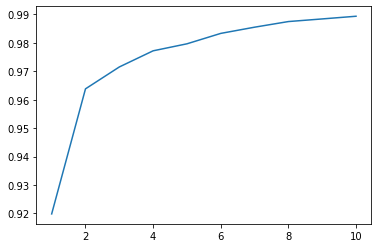

In [42]:
plt.plot(range(1,11),history.history['accuracy'])

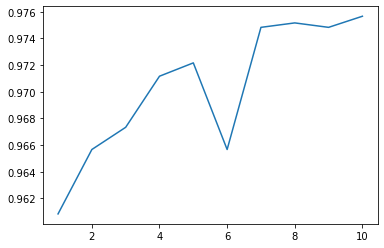

In [40]:
plt.plot(range(1,11),history.history['val_accuracy'])

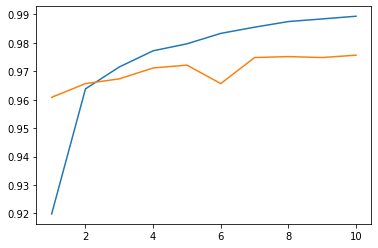

In [43]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])